In [7]:
import numpy as np
import matplotlib.pyplot as plt

goal = 100 
s = list(range(101)) 
v = np.zeros(len(s)) 
rewards= np.zeros(len(s)) 
rewards[goal] = 1.0 
head_probability = 0.4  
tail_probability = 1 - head_probability 

In [8]:
def gambler (goal, s, head_probability, tail_probability):
    epsilon = 1e-8 
    overall_error =1 
    
    
    # compute value iteration
    i = 0
    fig1 = plt.figure()
    while overall_error > epsilon: 
        i += 1
        overall_error= 0
        

        
        
        for state in s[1:]:
            v_temp = v[state]
            a = np.arange(min(state, goal-state)+1) 
            a_values = np.zeros(len(a)) 
            for action in a[1:goal]:
                a_values[action] = rewards[state]+head_probability*v[state+action]+tail_probability*v[state-action]
            if len(a_values[1:]):
                v[state] = np.max(a_values[1:])
            else:
                v[state] = rewards[state] 
            overall_error += np.abs(v_temp - v[state])
        
        if i == 1 or i==2 or i ==3:
            plt.plot(v, label = 'iteration'+str(i))

    if overall_error < epsilon:
        plt.plot(v, label = 'final iteration')
        plt.legend()
        plt.xlabel('state')
        plt.ylabel('state values')
        plt.title('State values per iteration step')
        plt.legend()
        fig1.savefig('ex2'+'.png')
    optimal_policy = np.zeros(len(s))
    for state in s[1:-1]:
        a =np.arange(min(state, goal-state)+1)
        a_values = np.zeros(len(a))
        for action in a[1:] :
            a_values[action] = rewards[state]+head_probability*v[state+action]+tail_probability*v[state-action]
        print(a_values)
        optimal_policy[state]=a[np.argmax(np.round(a_values, 4))]  	
    
    fig2 = plt.figure()
    plt.bar(range(1, len(optimal_policy)+1),optimal_policy)
    plt.legend()
    plt.xlabel('state')
    plt.ylabel('action')
    plt.title('Optimal action per state')
    plt.legend()
    fig2.savefig('optimal_policy'+'.png')

[0.         0.00206562]
[0.         0.00492956 0.00516406]
[0.         0.0082625  0.00819353 0.00922547]
[0.         0.01248944 0.01232391 0.01236502 0.01291015]
[0.         0.01697156 0.01666093 0.01600859 0.0163134  0.0173854 ]
[0.         0.02155688 0.02065625 0.02060931 0.02048384 0.02138116
 0.02306368]
[0.         0.02674836 0.02550527 0.02513149 0.02567707 0.02616211
 0.02733512 0.02781411]
[0.         0.0317625  0.03122361 0.03057303 0.03080977 0.03163103
 0.03091255 0.03101187 0.03227539]
[0.         0.03675063 0.03683026 0.03690188 0.03652699 0.03556021
 0.03530778 0.03537382 0.03588379 0.03768507]
[0.         0.04275283 0.04242891 0.04278422 0.04165232 0.04020374
 0.04002148 0.0401797  0.04078351 0.04249682 0.0434635 ]
[0.         0.04914178 0.04870679 0.04717935 0.04646096 0.04611359
 0.04507566 0.04543117 0.04679273 0.04656193 0.04762603 0.05035447]
[0.         0.05630843 0.05389221 0.05238354 0.05164062 0.05133289
 0.05152328 0.05168869 0.05120959 0.05192193 0.05345291 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


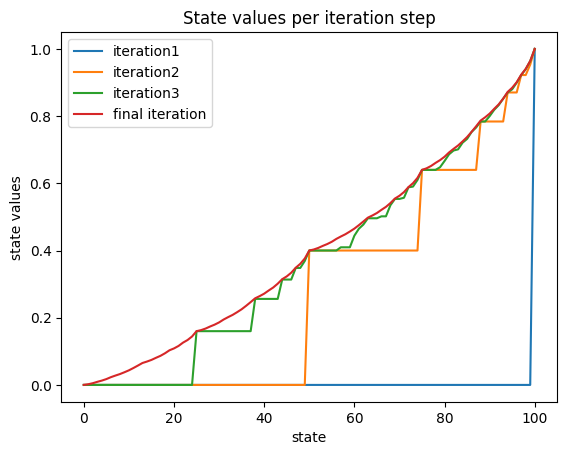

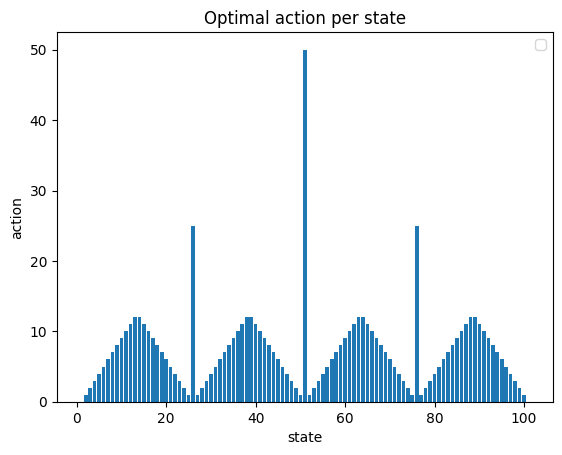

In [9]:
gambler(goal, s, head_probability, tail_probability)